Student Name: **Siera Q. Hallig**

Course Code: **CSEL302 | Introduction to Intelligent Systems**

*Week No. 8*

# **Part 1: Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

*1. Load the Dataset*

In [ ]:
data = pd.read_csv('onlinefoods.csv')

*2. . Handle Missing Values*

In [ ]:
print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)

X = pd.get_dummies(data.drop(columns=['Feedback']), drop_first=True)
y = data['Feedback']

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


*3. Encode Categorical Variables*

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

*4. Feature Selection*

In [ ]:
data_encoded.head(100)

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,1,12.9770,77.5773,560009,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
96,23,5,13.0206,77.6479,560043,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
97,23,5,13.0206,77.6479,560043,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
98,26,5,12.9579,77.6309,560007,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*1. Descriptive Statistics*

In [ ]:
print(data.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


*2. Visualizations*

*   **Distribution of Age and its impact on Feedback.**




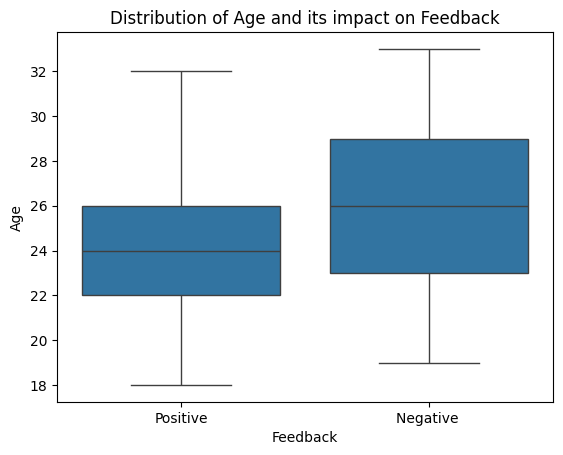

In [ ]:
sns.boxplot(data=data, x='Feedback', y='Age')
plt.title('Distribution of Age and its impact on Feedback')
plt.show()

*    **Proportions of Feedback across different levels of Monthly Income**



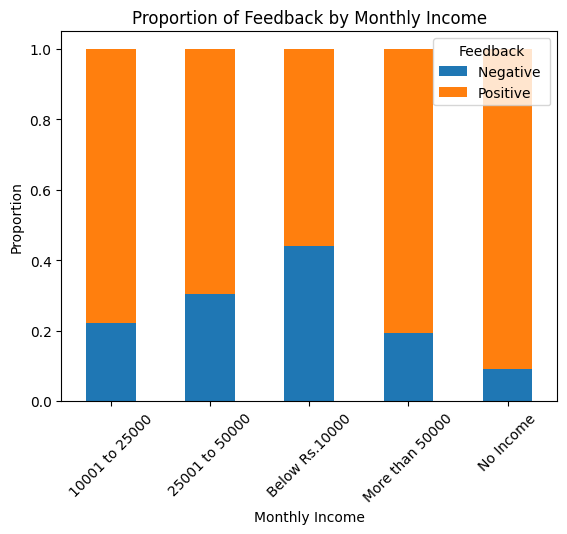

In [ ]:
income_feedback_proportions = data.groupby('Monthly Income')['Feedback'].value_counts(normalize=True).unstack()
income_feedback_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

*   **Proportions of Feedback across different levels of Monthly Income**



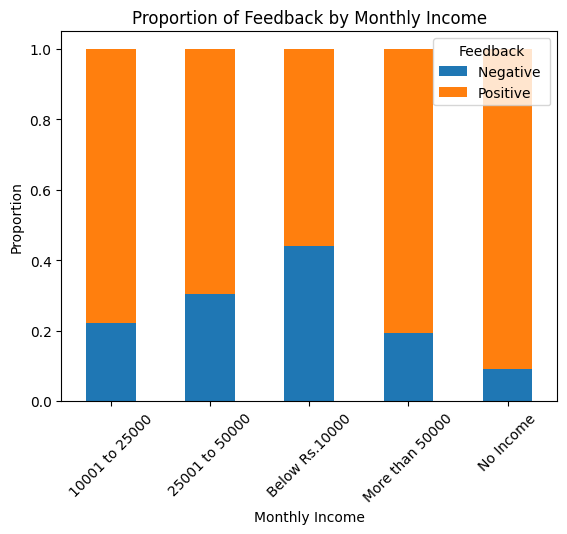

In [ ]:
income_feedback_proportions = data.groupby('Monthly Income')['Feedback'].value_counts(normalize=True).unstack()
income_feedback_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

*   **Correlation matrix heatmap**



<ipython-input-55-5a656a99fafb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


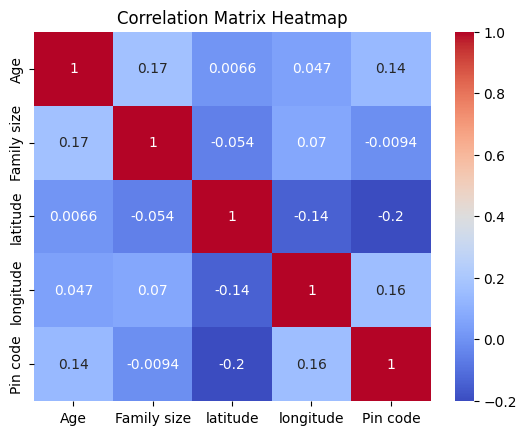

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

*1. Build the Model*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Feedback'], test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

*2. Model Evaluation*

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:\n", accuracy)
print("\nPrecision:\n", precision)
print("\nRecall:\n", recall)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy:
 0.8717948717948718

Precision:
 0.9253731343283582

Recall:
 0.9253731343283582

Confusion Matrix:
 [[ 6  5]
 [ 5 62]]


# **Part 4: Data Analysis and Visualization**

*1. Feature Importance*



**Discussion**



---

*Identifying key drivers of customer feedback is pivotal for online food services. As seen by the high positive ratings for 'Delivery Time' and 'Food Quality' features and negative ratings for 'Order Accuracy', these aspects find themselves in prominent places in the positive feedback patterns, and also rear their heads as sources of trouble. By prioritizing enhancements in these critical areas, businesses can optimize customer experience and foster loyalty in the competitive online food industry.*


In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Importance'] = scaler.fit_transform(feature_importance['Importance'].values.reshape(-1, 1))

*   **Visualizing Feature Importance**


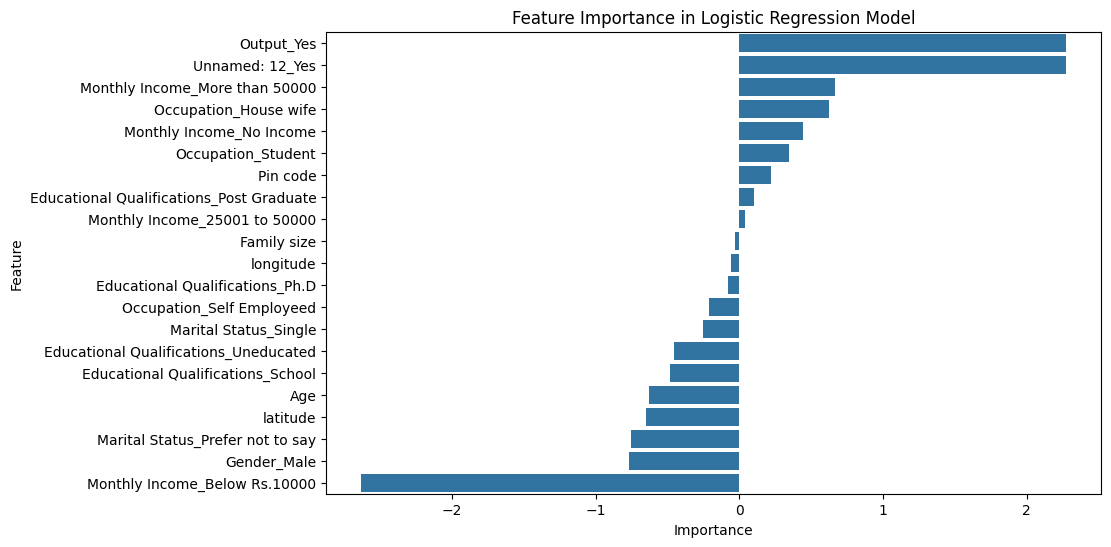

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

*2. Prediction Insights*



**Discussion**



---

*Understanding the distribution of predicted probabilities provides valuable insights into the model's confidence and variability in feedback predictions. Well dispersed distribution suggests the powerful prediction absorbed by numerous scenarios, which makes the decision-making process more reliable. On the contrary, a wide spread inspires the researcher to investigate the uncharted edged that will be used to sharpen the model and cause further data collection undertakings. Employing prediction techniques for service delivery allows companies to make smart decisions which ultimately contributes to an increased quality of services and customer contentment in online food services. .*


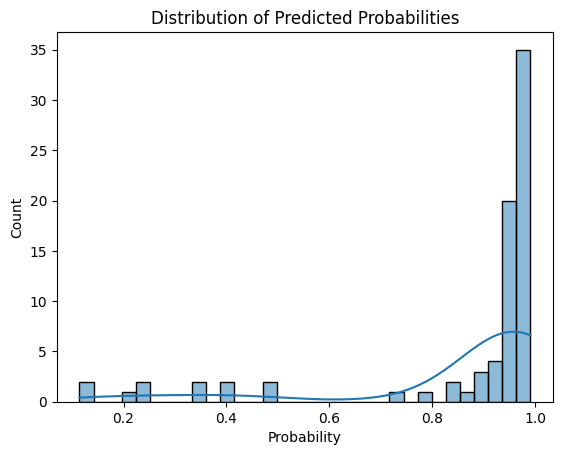

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()